In [54]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
from nltk.corpus import stopwords


In [55]:
stock1 = pd.read_csv("AAPL.csv")
stock2 = pd.read_csv("MSFT.csv")



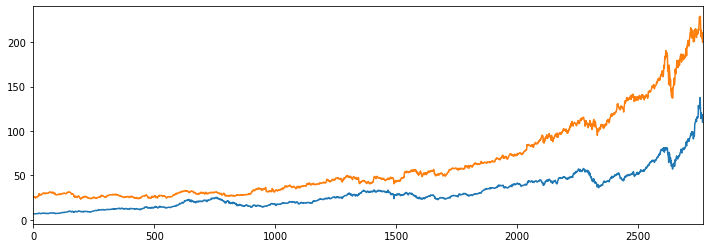

In [56]:
import matplotlib.pyplot as plt

stock1['Open'].plot(figsize=(12,4),label='AAPL Stock')
stock2['Open'].plot(figsize=(12,4),label='MSFT Stock')

plt.show()


In [57]:
stock2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2.769000e+03
mean,63.963868,64.561322,63.333496,63.983063,59.910382,4.037384e+07
std,45.953716,46.474798,45.373649,45.957649,47.325218,2.307689e+07
min,23.090000,23.320000,22.730000,23.010000,18.133703,7.425600e+06
25%,29.660000,29.889999,29.420000,29.709999,24.187122,2.483380e+07
50%,45.930000,46.340000,45.570000,45.939999,41.130180,3.473280e+07
75%,85.430000,86.000000,84.879997,85.500000,82.166878,5.035250e+07
max,229.270004,232.860001,227.350006,231.649994,231.649994,3.193179e+08


In [58]:
stock = stock2
news = pd.read_csv("us_equities_news_dataset.csv")
news = news.groupby(['release_date'])['title'].apply(','.join).reset_index()
news = news[news.release_date.isin(stock.Date)]
print(len(set(stock.Date)))
print(len(set(news.release_date)))
df_final = pd.merge(left=news, left_on='release_date',right=stock, right_on='Date')

2769
2428


In [59]:
df_final

,release_date,title,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-09-21,UPDATE 4 China buys Noble stake seeks commodi...,2009-09-21,25.110001,25.370001,25.100000,25.299999,19.669508,28878700
1,2009-09-22,US STOCKS Wall St to open up as commods rise o...,2009-09-22,25.400000,25.820000,25.290001,25.770000,20.034918,61376700
2,2009-09-23,Nikkei climbs on U S economy optimism after F...,2009-09-23,25.920000,26.250000,25.639999,25.709999,19.988264,60599900
3,2009-09-24,Nikkei gains 1 2 pct after holiday JAL Aiful...,2009-09-24,25.920000,26.110001,25.660000,25.940001,20.167082,56302900
4,2009-09-25,US STOCKS Wall St drops on recovery worry RIM...,2009-09-25,25.690001,25.820000,25.520000,25.549999,19.863878,50158900
5,2009-09-28,GLOBAL MARKETS Yen surge hits Japan shares ri...,2009-09-28,25.600000,26.160000,25.600000,25.830000,20.081566,44358000
6,2009-09-29,Nikkei edges up 0 9 pct but yen worries remai...,2009-09-29,25.910000,25.959999,25.690001,25.750000,20.019367,39050300
7,2009-09-30,CORRECTED CORRECTED CORRECTED GLOBAL MARKETS...,2009-09-30,25.760000,25.990000,25.379999,25.719999,19.996044,63533400
8,2009-10-01,Nikkei hits 2 month low after disappointing US...,2009-10-01,25.410000,25.469999,24.799999,24.879999,19.342987,75958100
9,2009-10-02,European shares hit 4 week low before US jobs ...,2009-10-02,24.459999,25.090000,24.430000,24.959999,19.405176,51219700


In [60]:
pip install cufflinks --upgrade

Requirement already up-to-date: cufflinks in /anaconda3/lib/python3.7/site-packages (0.17.3)
Note: you may need to restart the kernel to use updated packages.


In [61]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'0,0', '00', text) 
    text = re.sub(r'[_"\-;()|.,+&=*!?:#@\[\]]', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'\$', ' $ ', text)
    text = re.sub(r'u s ', ' united states ', text)
    text = re.sub(r'u n ', ' united nations ', text)
    text = re.sub(r'u k ', ' united kingdom ', text)
    text = re.sub(r' s ', ' ', text)
    text = re.sub(r' yr ', ' year ', text)
    text = re.sub(r'0km ', '0 km ', text)
    
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

In [62]:
import nltk
nltk.download('stopwords')

df_final['title'] = df_final['title'].apply(lambda Text: pd.Series(clean_text(Text)))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xarismallios/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
from sklearn.feature_extraction.text import CountVectorizer
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df_final['title'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['title' , 'count'])
df1.groupby('title').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in news after removing stop words')

earnings 30787
stocks 20567
united 17485
states 16622
stock 15438
estimates 8308
trade 8180
market 7197
top 6531
beat 6448
buy 6382
q3 6250
new 6173
q1 6033
higher 5963
q4 5962
q2 5443
revenues 5351
report 5254
china 4863


In [64]:
from textblob import TextBlob

df_final[['polarity','subjectivity']] = df_final['title'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))


In [65]:
groups = df_final.groupby(df_final['polarity'].apply(lambda x: 'negative' if x < -0.1 else 'positive' if x > 0.1 else 'neutral'))['polarity'].count()
groups

polarity
negative      56
neutral     1442
positive     930
Name: polarity, dtype: int64

In [66]:
df_final

,release_date,title,Date,Open,High,Low,Close,Adj Close,Volume,polarity,subjectivity
0,2009-09-21,update 4 china buys noble stake seeks commodit...,2009-09-21,25.110001,25.370001,25.100000,25.299999,19.669508,28878700,0.043640,0.270175
1,2009-09-22,us stocks wall st open commods rise weak dolla...,2009-09-22,25.400000,25.820000,25.290001,25.770000,20.034918,61376700,0.022593,0.280494
2,2009-09-23,nikkei climbs united states economy optimism f...,2009-09-23,25.920000,26.250000,25.639999,25.709999,19.988264,60599900,0.035067,0.299885
3,2009-09-24,nikkei gains 1 2 pct holiday jal aiful sink ni...,2009-09-24,25.920000,26.110001,25.660000,25.940001,20.167082,56302900,0.050062,0.224291
4,2009-09-25,us stocks wall st drops recovery worry rim res...,2009-09-25,25.690001,25.820000,25.520000,25.549999,19.863878,50158900,0.084524,0.159524
5,2009-09-28,global markets yen surge hits japan shares ris...,2009-09-28,25.600000,26.160000,25.600000,25.830000,20.081566,44358000,0.030357,0.188244
6,2009-09-29,nikkei edges 0 9 pct yen worries remain nikkei...,2009-09-29,25.910000,25.959999,25.690001,25.750000,20.019367,39050300,0.018180,0.277739
7,2009-09-30,corrected corrected corrected global markets a...,2009-09-30,25.760000,25.990000,25.379999,25.719999,19.996044,63533400,0.172980,0.339646
8,2009-10-01,nikkei hits 2 month low disappointing us data ...,2009-10-01,25.410000,25.469999,24.799999,24.879999,19.342987,75958100,-0.074383,0.348765
9,2009-10-02,european shares hit 4 week low us jobs data eu...,2009-10-02,24.459999,25.090000,24.430000,24.959999,19.405176,51219700,-0.030093,0.163889


In [67]:
df_final.drop(['title', 'Date','subjectivity'], axis=1)

,release_date,Open,High,Low,Close,Adj Close,Volume,polarity
0,2009-09-21,25.110001,25.370001,25.100000,25.299999,19.669508,28878700,0.043640
1,2009-09-22,25.400000,25.820000,25.290001,25.770000,20.034918,61376700,0.022593
2,2009-09-23,25.920000,26.250000,25.639999,25.709999,19.988264,60599900,0.035067
3,2009-09-24,25.920000,26.110001,25.660000,25.940001,20.167082,56302900,0.050062
4,2009-09-25,25.690001,25.820000,25.520000,25.549999,19.863878,50158900,0.084524
5,2009-09-28,25.600000,26.160000,25.600000,25.830000,20.081566,44358000,0.030357
6,2009-09-29,25.910000,25.959999,25.690001,25.750000,20.019367,39050300,0.018180
7,2009-09-30,25.760000,25.990000,25.379999,25.719999,19.996044,63533400,0.172980
8,2009-10-01,25.410000,25.469999,24.799999,24.879999,19.342987,75958100,-0.074383
9,2009-10-02,24.459999,25.090000,24.430000,24.959999,19.405176,51219700,-0.030093


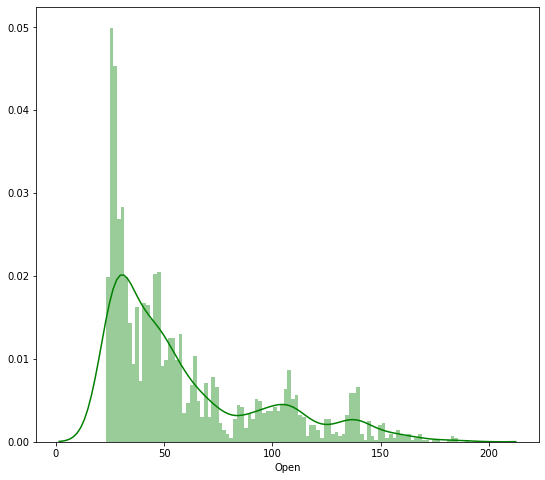

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

df_final.describe()

plt.figure(figsize=(9, 8))
sns.distplot(df_final['Open'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [69]:
df_final['Open'].corr(df_final['polarity'])



0.2719210807490395

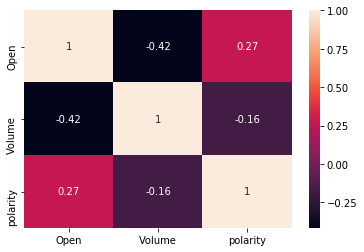

In [70]:

import seaborn as sns

sns.heatmap(df_final[['Open','Volume','polarity']].corr(),annot=True)
